# Assignment: Visualization
### `! git clone https://github.com/ds3001f25/visualization_assignment.git`
### Do Q1 and Q2.

**Q1.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use the pretrail data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import iqr
from scipy.spatial.distance import cdist
import seaborn as sns

# Silverman's
def silverman_bandwith(x):
  """
  Silverman's rule of thumb for the bandwidth
  """
  n = len(x)
  std = np.std(x, ddof=1)
  return 0.9 * min(std, iqr(x)/1.34) * n**(-1/5)

pretrial_data = pd.read_csv("pretrial_data.csv")

In [ ]:
def kernel_function(z, kernel = "gaussian"):
  """
  Return kernel weights
  """
  if kernel == "gaussian":
    return 1/np.sqrt(2*np.pi) * np.exp(-0.5 * z**2)
  elif kernel == "uniform":
    return 0.5 * ((np.abs(z) <= 1).astype(float))
  elif kernel == "epanechnikov":
    return 0.75 * (1-z**2) * (np.abs(z) <= 1)
  else:
    raise ValueError("Unknown Kernel")


In [ ]:
def custom_kde(x, grid = None, bandwith = None, kernel = "gaussian"):
  """
  Custom Kernel Density Estimation
  parameters:
    x: pandas series
    grid: points where density is evaluated
    bandwith: smoothing parameter
    kernel: guassian
  """
  x = np.asarray(pd.Series(x).dropna())
  n = len(x)

  # bandwith
  if bandwith is None:
    bandwith = silverman_bandwith(x)

  # eval grid
  if grid is None:
    grid = np.linspace(x.min() - 3*bandwith, x.max() + 3*bandwith, 200)

  # pairwise standardized distances
  z = (grid[:, None] -x[None,:]) / bandwith

  # apply kernel
  values = kernel_function(z, kernel)

  # average to get density
  density = values.mean(axis=1) / bandwith

  return grid, density



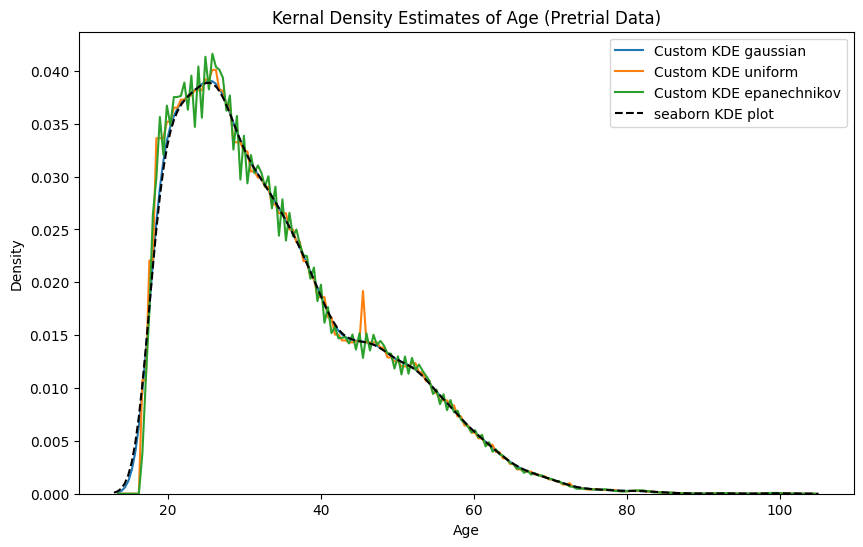

In [ ]:
age_data = pretrial_data["age"].dropna() # remove missing values

# KDE function on age

plt.figure(figsize=(10, 6))
for k in ["gaussian", "uniform", "epanechnikov"]:
  grid, density = custom_kde(age_data, kernel=k)
  plt.plot(grid, density, label=f"Custom KDE {k}")

# Built in function to replicate
sns.kdeplot(age_data, label="seaborn KDE plot", color = "black", linestyle = "--")

# Labels and legend for clarity
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Kernal Density Estimates of Age (Pretrial Data)")
plt.legend()
plt.show()


**Q2.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
# Question 2

cc = pd.read_csv('college_completion.csv')

# print dimensions
print("dimensions: ", cc.shape)

# printn observations
print("observations: ", cc.shape[0])

# print variables
print("variables: ", cc.columns)

# print first few rows
cc.head()

dimensions:  (3798, 63)
observations:  3798
variables:  Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enrol

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [ ]:
ct = pd.crosstab(cc["control"], cc["level"])
print(ct)

# add row/column totals
ct_with_totals = pd.crosstab(cc["control"], cc["level"], margins=True, margins_name="Total")
print(ct_with_totals)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                   2-year  4-year  Total
control                                      
Private for-profit         465     527    992
Private not-for-profit      68    1180   1248
Public                     926     632   1558
Total                     1459    2339   3798


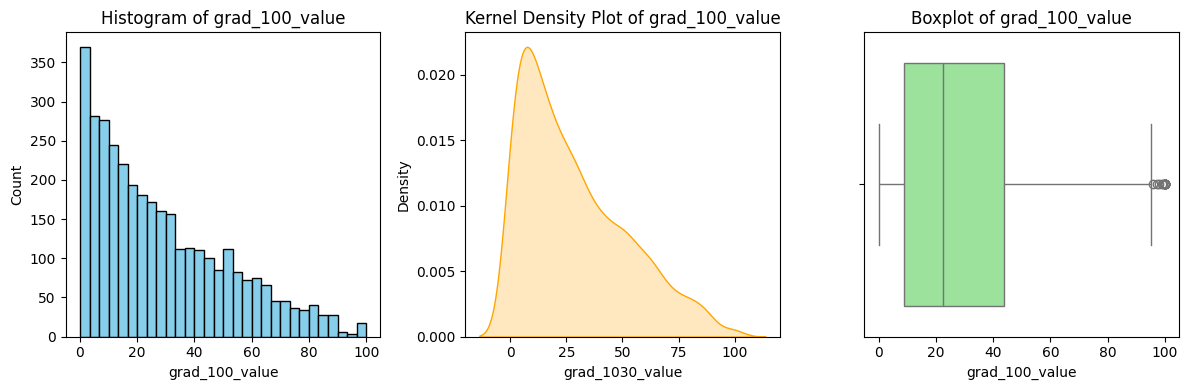

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [ ]:
# grad rate

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(cc["grad_100_value"].dropna(), bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of grad_100_value")
plt.xlabel("grad_100_value")
plt.ylabel("Count")

# KDE
plt.subplot(1,3,2)
sns.kdeplot(cc["grad_100_value"].dropna(), fill=True, color='orange')
plt.title("Kernel Density Plot of grad_100_value")
plt.xlabel("grad_1030_value")

# Boxplot
plt.subplot(1,3,3)
sns.boxplot(x=cc["grad_100_value"], color = "lightgreen")
plt.title("Boxplot of grad_100_value")

plt.tight_layout()
plt.show()

# Stats description
print(cc["grad_100_value"].describe())

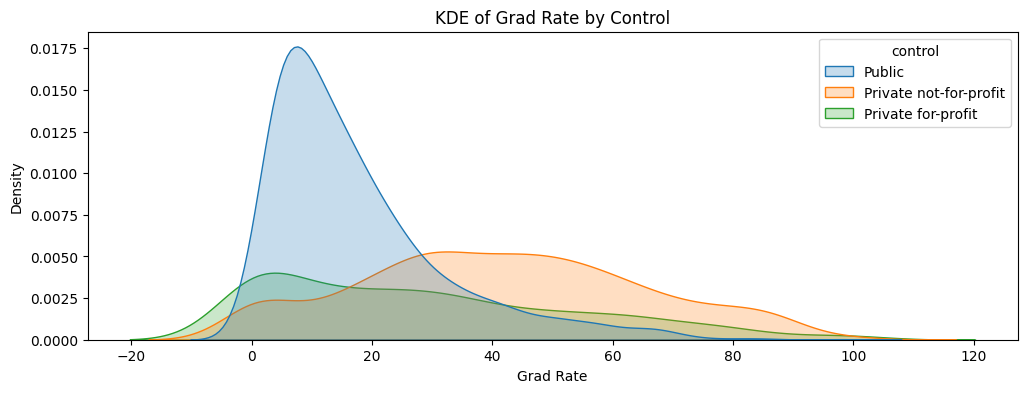

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=cc, x=pd.to_numeric(cc["grad_100_value"], errors="coerce"), hue = "control", fill=True)
plt.title("KDE of Grad Rate by Control")
plt.xlabel("Grad Rate")
plt.show()

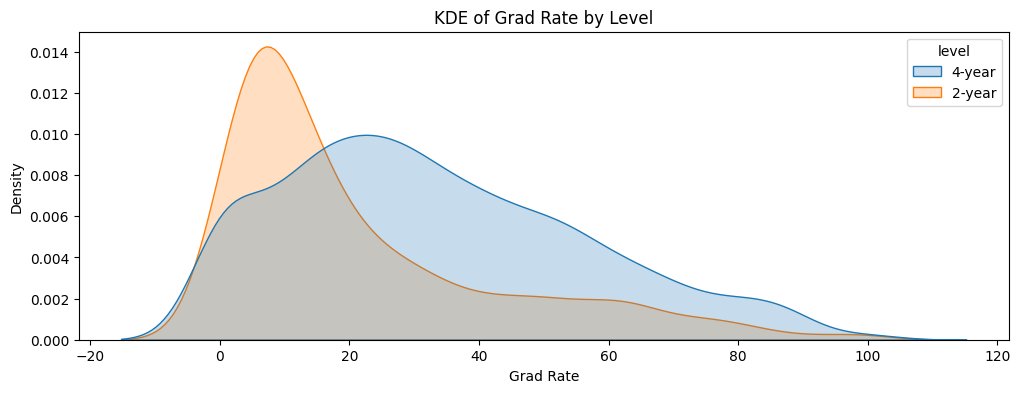

In [ ]:
#KDE by level
plt.figure(figsize=(12,4))
sns.kdeplot(data=cc, x=pd.to_numeric(cc["grad_100_value"], errors="coerce"), hue = "level", fill=True)
plt.title("KDE of Grad Rate by Level")
plt.xlabel("Grad Rate")
plt.show()

In [ ]:
# grad rate by control

print(cc.groupby('control')["grad_100_value"].describe())

# grad rate by level
print(cc.groupby('level')["grad_100_value"].describe())

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


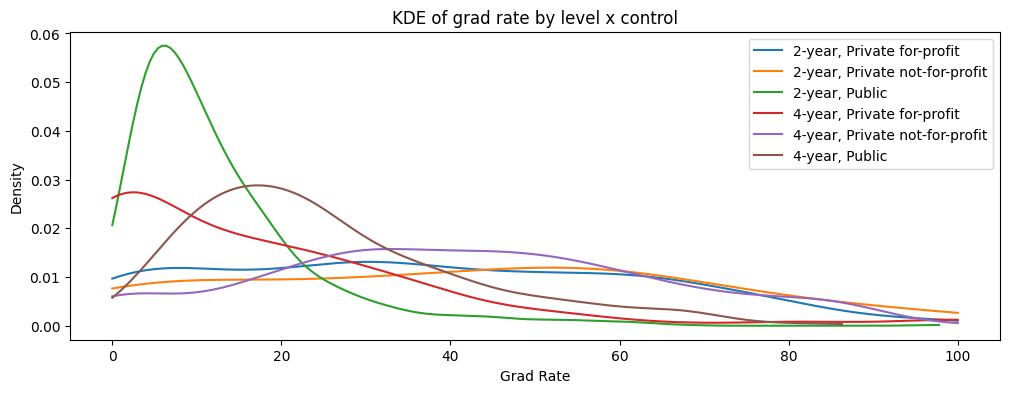

In [ ]:
cc["levelXcontrol"]= cc["level"].astype(str)+", "+cc["control"].astype(str)

# kde grouped by levelXcontrol
from scipy.stats import gaussian_kde
plt.figure(figsize=(12,4))
for group,data in cc.groupby("levelXcontrol"):
  values = pd.to_numeric(data["grad_100_value"], errors="coerce").dropna()
  if len(values) > 1:
    kde = gaussian_kde(values)
    x = np.linspace(values.min(), values.max(), 200)
    plt.plot(x, kde(x), label=group)

plt.title("KDE of grad rate by level x control")
plt.xlabel("Grad Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

The institutions with the best graduation outcomes are the 4 yuear private not for profit schools, while the lowest outocmes are mostly in 2 year public schools and for profits.

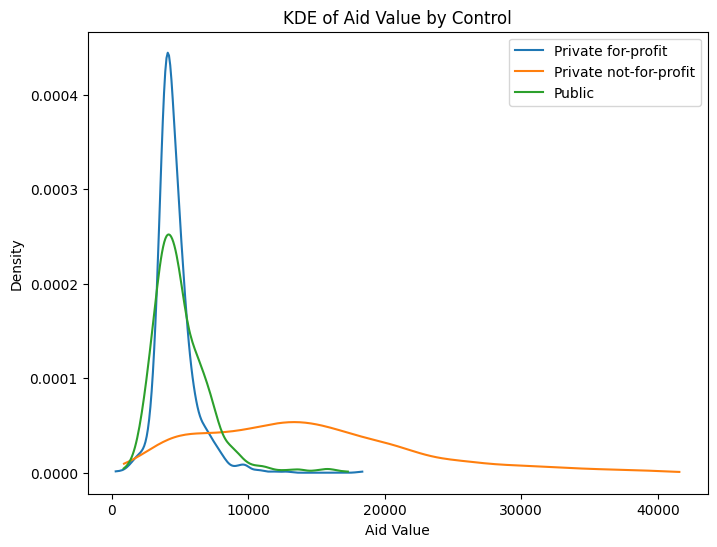

In [ ]:
cc["aid_value_num"] = pd.to_numeric(cc["aid_value"], errors="coerce")

plt.figure(figsize=(8,6))
for group, data in cc.groupby("control"):
  values = pd.to_numeric(data["aid_value"], errors="coerce").dropna()
  if len(values) > 1:
    kde = gaussian_kde(values)
    x = np.linspace(values.min(), values.max(), 200)
    plt.plot(x, kde(x), label=group)

plt.title("KDE of Aid Value by Control")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.legend()
plt.show()

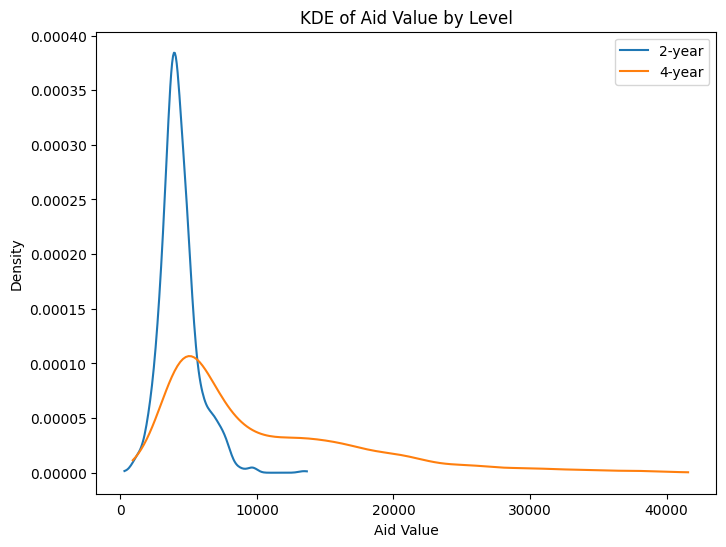

In [ ]:
plt.figure(figsize=(8,6))

for group,data in cc.groupby("level"):
  values = pd.to_numeric(data["aid_value"], errors="coerce").dropna()
  if len(values) > 1:
    kde = gaussian_kde(values)
    x = np.linspace(values.min(), values.max(), 200)
    plt.plot(x, kde(x), label=group)

plt.title("KDE of Aid Value by Level")
plt.xlabel("Aid Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
print(cc.groupby("control")["aid_value_num"].describe())
print(cc.groupby("level")["aid_value_num"].describe())

                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year  2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

            max  
level            
2-year  1

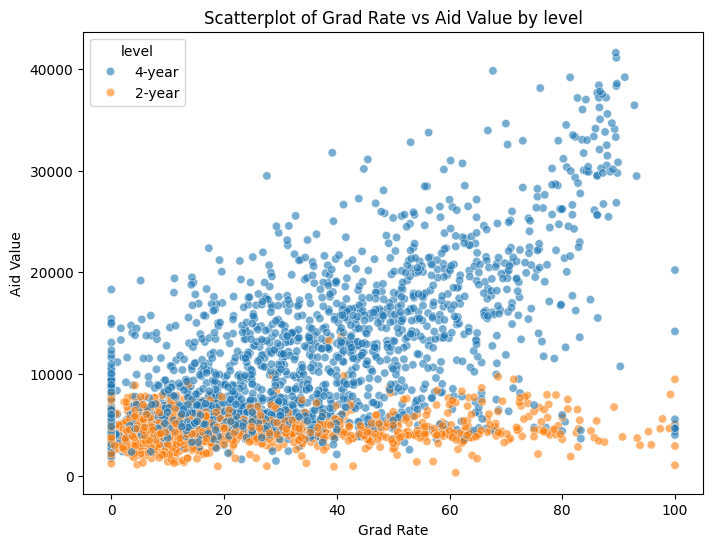

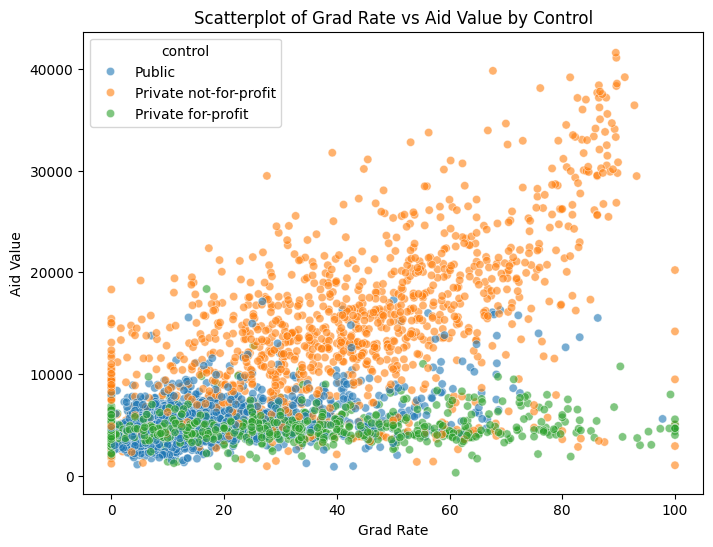

In [ ]:
grad100 = pd.to_numeric(cc["grad_100_value"], errors="coerce").dropna()
aid = pd.to_numeric(cc["aid_value"], errors="coerce")

# Scatterplot by level
plt.figure(figsize=(8,6))
sns.scatterplot(x=grad100, y=aid, hue=cc["level"], alpha = 0.6)
plt.title("Scatterplot of Grad Rate vs Aid Value by level")
plt.xlabel("Grad Rate")
plt.ylabel("Aid Value")
plt.show()

# Scatterplot by control
plt.figure(figsize=(8,6))
sns.scatterplot(x=grad100, y=aid, hue=cc["control"], alpha = 0.6)
plt.title("Scatterplot of Grad Rate vs Aid Value by Control")
plt.xlabel("Grad Rate")
plt.ylabel("Aid Value")
plt.show()

the plot shows that the 4 year institutions and private not for profits tend to award more aid and acheive higher graduation rates, while 2 year and for profit schools cluster at lower aid and loower graduation outcomes. This suggests that aid is most strongly associated with better graduation rates at 4 year private not for profit institutions.